In [1]:
import sys
import numpy as np
from pathlib import Path
from collections import defaultdict

sys.path.insert(0, "../python/")

from report_blocks import extract_blocks, BlockInfo


report_path = Path("/home/andre/Documentos/tcc/experiments/reported_blocks_600/")
all_blocks = []

def load_light_fields(lf_name):
    pathlist = Path(report_path).glob(f'{lf_name}*.json')
    for path in pathlist:
        blocks = extract_blocks(path)
        all_blocks.extend(blocks)


    by_lambda = defaultdict(list)
    for block in all_blocks:
        by_lambda[block.lf_lambda].append(block)

    light_fields = dict()
    for lf_lambda, blocks in by_lambda.items():
        lf = dict(
            mse=np.average([b.mse for b in blocks]),
            bpp=np.average([b.bpp for b in blocks]),
            lf_lambda=lf_lambda
        )
        light_fields[lf_lambda] = lf
    
    return light_fields

In [2]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def hyperbolic_function(x, a, b):
    return a * (x ** b)

def hyperbolic_derivative(x, a, b):
    return - a * b * (x ** (b - 1))

def plot_r_lambda_fit(lf_name: str):
    light_fields = load_light_fields(lf_name)

    bpps = [lf["bpp"] for lf in light_fields.values()]
    lambdas = [lf["lf_lambda"] for lf in light_fields.values()]
    mses = [lf["mse"] for lf in light_fields.values()]

    popt, pcov = curve_fit(hyperbolic_function, bpps, lambdas)
    plt.figure(figsize=[5, 3])
    plt.scatter(bpps, lambdas, color="dodgerblue", label=r"Dados R-$\lambda$")
    plt.plot(bpps, hyperbolic_function(bpps, *popt), linewidth=3, color="crimson", label=r"$\lambda = a * R^{b}$")
    plt.legend()

    plt.title(f"Ajuste de R-$\lambda$: {lf_name}")
    plt.xscale("log")
    plt.xlabel("Taxa (bpp)")
    plt.ylabel("Multiplicador Lagrangiano ($\lambda$)")
    plt.tight_layout()
    plt.savefig(f"rlambda_fit/{lf_name.lower()}.png", dpi=300)
    plt.savefig(f"rlambda_fit/{lf_name.lower()}.pdf")
    plt.show()

def plot_rd_lambda_fit(lf_name: str):
    light_fields = load_light_fields(lf_name)

    bpps = [lf["bpp"] for lf in light_fields.values()]
    lambdas = [lf["lf_lambda"] for lf in light_fields.values()]
    mses = [lf["mse"] for lf in light_fields.values()]

    popt, pcov = curve_fit(hyperbolic_function, bpps, mses)

    plt.figure(figsize=[5, 3])
    plt.scatter(bpps, mses, color="limegreen", label="R-D data")
    plt.plot(bpps, hyperbolic_function(bpps, *popt), linewidth=3, color="crimson", label=r"$D = a * R^{b}$")
    plt.legend()

    plt.title(f"Ajuste de R-D: {lf_name}")
    plt.xscale("log")
    plt.xlabel("Taxa (bpp)")
    plt.ylabel("Distorção (MSE)")
    plt.tight_layout()
    plt.savefig(f"rd_fit/{lf_name.lower()}.png", dpi=300)
    plt.savefig(f"rd_fit/{lf_name.lower()}.pdf")
    plt.show()

    plt.figure(figsize=[5, 3])
    plt.scatter(bpps, lambdas, color="dodgerblue", label="Dados R-$\lambda$")
    plt.plot(bpps, hyperbolic_derivative(bpps, *popt), linewidth=3, color="crimson", label=r"$\lambda = - a * b * R^{b - 1}$")
    plt.legend()

    plt.title(f"Ajuste de R-$\lambda$: {lf_name}")
    plt.xscale("log")
    plt.xlabel("Taxa (bpp)")
    plt.ylabel("Multiplicador Lagrangiano ($\lambda$)")
    plt.tight_layout()
    # plt.savefig(f"rd_fit/{lf_name}_rlambda", dpi=300)
    plt.show()

/usr/lib64/python3.11/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)


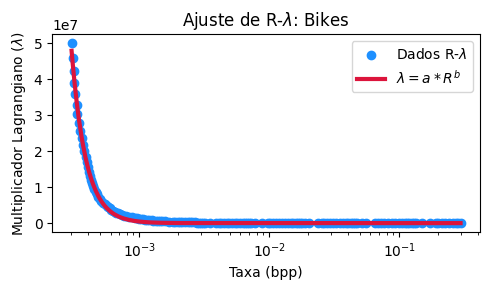

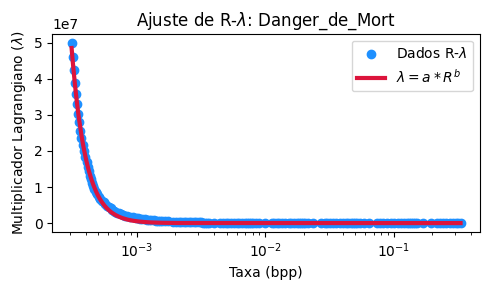

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)


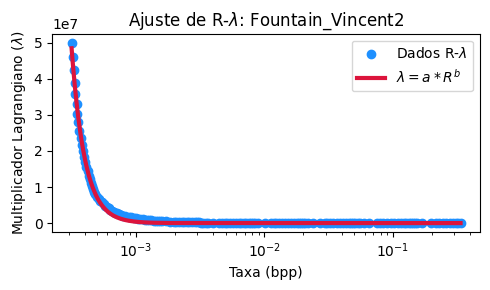

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


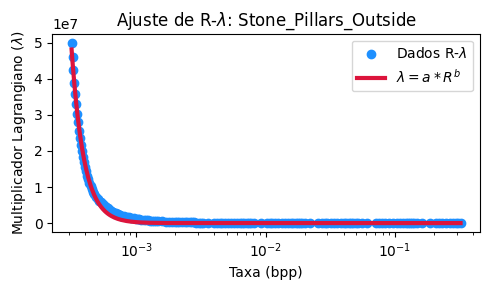

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


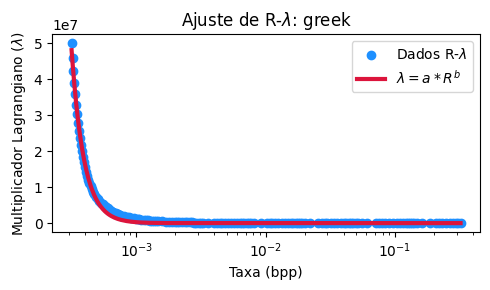

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


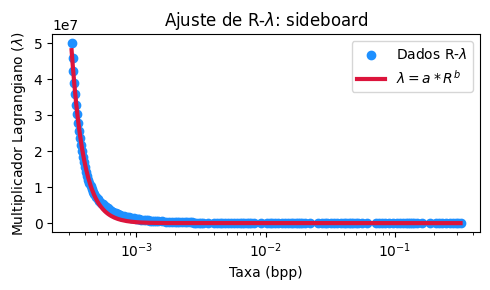

In [3]:
lf_names = [
    # Lenslets
    "Bikes",
    "Danger_de_Mort",
    "Fountain_Vincent2",
    "Stone_Pillars_Outside",

    # Synthetic
    "greek",
    "sideboard",
]

for lf_name in lf_names:
    plot_r_lambda_fit(lf_name)

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


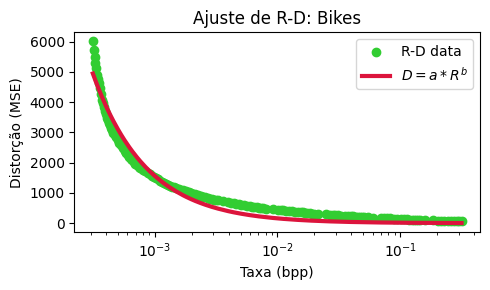

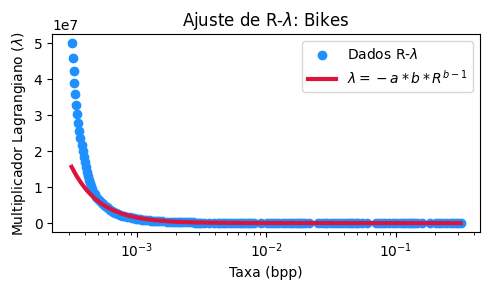

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


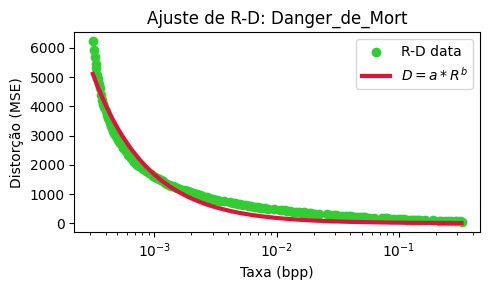

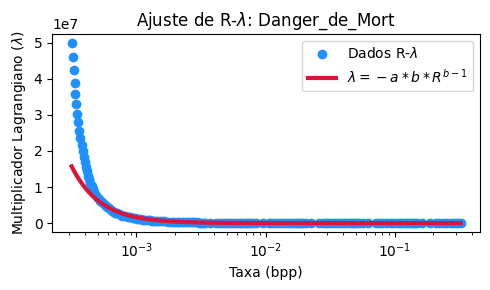

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)
/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in multiply
  return a * (x ** b)


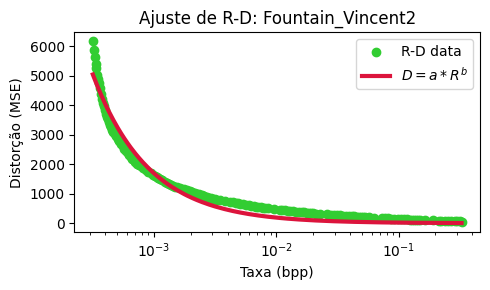

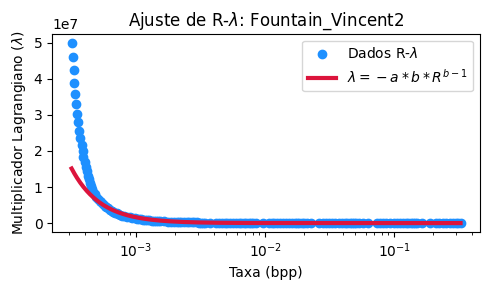

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)


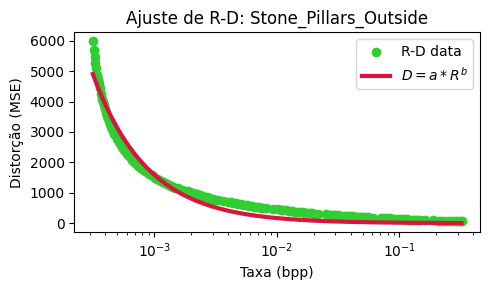

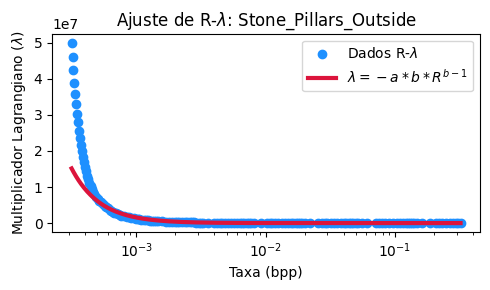

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)


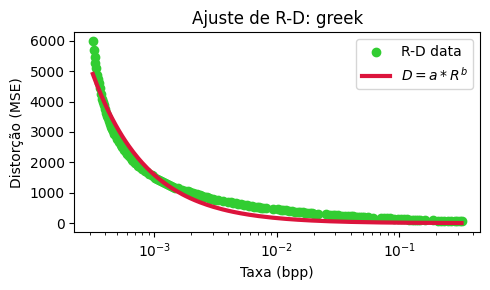

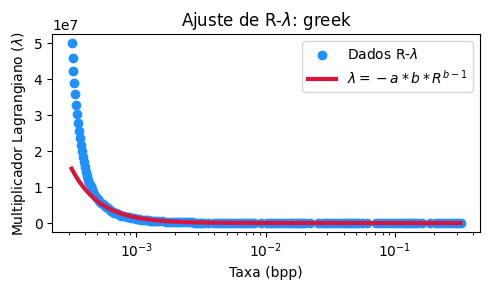

/tmp/ipykernel_172463/889980724.py:6: RuntimeWarning: overflow encountered in power
  return a * (x ** b)


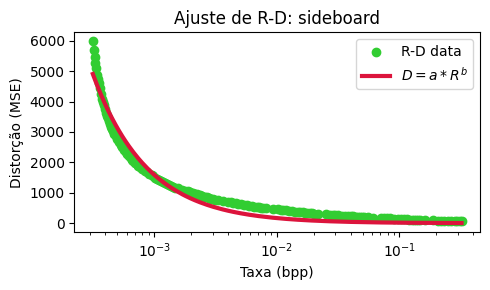

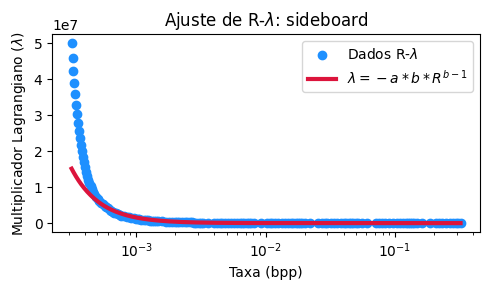

In [4]:
lf_names = [
    # Lenslets 
    "Bikes",
    "Danger_de_Mort",
    "Fountain_Vincent2",
    "Stone_Pillars_Outside",

    # Synthetic
    "greek",
    "sideboard",
]

for lf_name in lf_names:
    plot_rd_lambda_fit(lf_name)